In [21]:
from __future__ import division, print_function

In [22]:
import numpy as np

In [23]:
np.ceil(5), np.ceil(1.4), np.ceil(1.8)

(5.0, 2.0, 2.0)

In [24]:
np.log(10), np.log2(10), np.log10(10), np.log

(2.3025850929940459, 3.3219280948873622, 1.0, <ufunc 'log'>)

In [25]:
# no arbitrary base b login numpy
# easy :)
def log_maker(b):
    def logb(x):
        return np.log(x) / np.log(b)
    return logb
log4 = log_maker(4)
x = 100
y = log4(x)
x_hat = 4 ** y
x, y, x_hat

(100, 3.3219280948873626, 100.00000000000004)

In [32]:
def bodies(N, b):
    logb = log_maker(b)
    x = int(np.ceil(logb(N)))
    return N * np.sum([1 / b**i for i in range(x+1)])
    

In [33]:
bodies(100, 10)

111.00000000000001

In [35]:
bodies(100, 2)

199.21875

In [63]:
N_map = {}
for N in [30, 100, 1000, 100000]:

    x = []
    y = []
    for b in [2, 5, 10, 15, 20, 30, 50]:
        x.append(b)
        val = bodies(N, b)
        y.append(val / N)
    N_map[N] = x, y

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

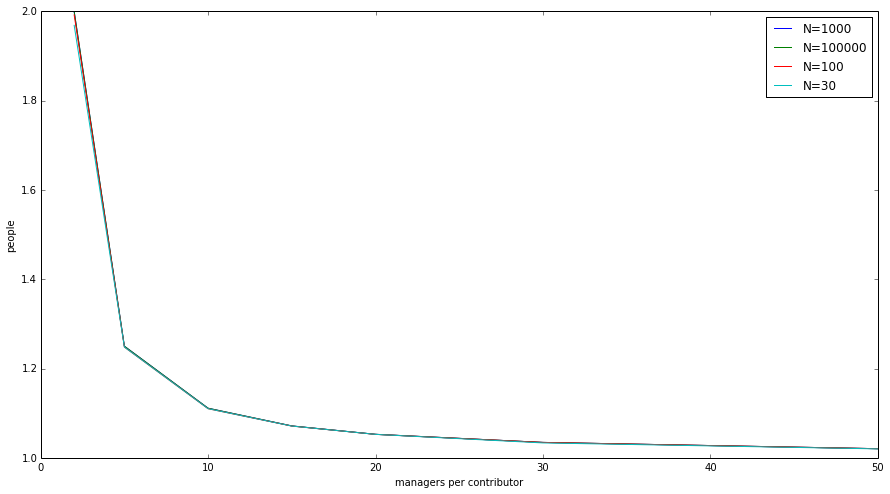

In [65]:
fig, ax = plt.subplots(figsize=(15, 8))
for N, (x, y) in N_map.iteritems():
    ax.plot(x, y, label='N={0}'.format(N))
ax.set_ylabel('people')
ax.set_xlabel('managers per contributor')
ax.legend()